# Introduction
This project is about worldwide data on hydro, wind, solar, biofuel, and geothermal 
energy. The data is in % of equivalent primary energy derived from renewable resources, and energy in TeraWatts per hour (TWh).

# 1. Questions for the analysis:
1. Country with the highest growth in % of equivalent primary energy derived from renewable resources from 1990 to 2021.
2. Growth in % of equivalent primary energy by continents from 1990 to 2021.
3. Evolution of % of equivalent primary energy from total renewable energies in the World, from 1970 to 2021.
4. Country with the highest capacity in TWh in 2021.
5. Country with the highest capacity in each category in TWh in 2021. 
6. Country with the highest growth in capacity in TWh from 1990 to 2021.
7. Continent with the highest growth in capacity in TWh from 1990 to 2021.
8. Evolution of capacity in TWh in the World, from 1990 to 2021, and total capacity en 2021.

In [1]:
library(tidyverse)
library(skimr)
library(janitor)
library(dplyr)
library(ggplot2)
library(readxl)
library(lubridate)
library(knitr)
library(kableExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




# 2. Data Processing
For this project, the objective is to analyze the percentage of equivalent primary energy of renewable energies that each country has through the time, archives [01, 06, 10, 14], and the energy in TWh produced by country, archive [03]. The datasets were already prepared and cleaned in Excel, so all the data has the right format, match and it could be joined together.

In [2]:
renewable_energy <- read_csv("/kaggle/input/pre-processed-renewable-energy/01 renewable-share-energy.csv")
renewable_electricity <- read_csv("/kaggle/input/renewable-energy-world-wide-19652022/03 modern-renewable-prod.csv")

Rows: 5465 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (5): Year, Renewables (% equivalent primary energy), Hydro (% equivalent...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8851 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (5): Year, Electricity from wind (TWh), Electricity from hydro (TWh), El...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
str(renewable_energy)
head(renewable_energy)
head(renewable_electricity)

spc_tbl_ [5,465 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Entity                                  : chr [1:5465] "Africa" "Africa" "Africa" "Africa" ...
 $ Code                                    : chr [1:5465] NA NA NA NA ...
 $ Year                                    : num [1:5465] 1971 1972 1973 1974 1975 ...
 $ Renewables (% equivalent primary energy): num [1:5465] 8.13 8.75 8.54 9.27 9.24 ...
 $ Hydro (% equivalent primary energy)     : num [1:5465] 8.08 8.7 8.49 9.22 9.19 ...
 $ Wind (% equivalent primary energy)      : num [1:5465] 0 0 0 0 0 0 0 0 0 0 ...
 $ Solar (% equivalent primary energy)     : num [1:5465] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Entity = col_character(),
  ..   Code = col_character(),
  ..   Year = col_double(),
  ..   `Renewables (% equivalent primary energy)` = col_double(),
  ..   `Hydro (% equivalent primary energy)` = col_double(),
  ..   `Wind (% equivalent primary energy)` = col_double(),
  ..   `Solar (% equivalent prima

Entity,Code,Year,Renewables (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Solar (% equivalent primary energy)
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,NA,1971,8.131308,8.076341,0,0
Africa,NA,1972,8.747766,8.695498,0,0
Africa,NA,1973,8.542279,8.492557,0,0
Africa,NA,1974,9.268067,9.219236,0,0
Africa,NA,1975,9.238402,9.193146,0,0
Africa,NA,1976,9.416414,9.371635,0,0


Entity,Code,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2000,0,0.31,0,0
Afghanistan,AFG,2001,0,0.50,0,0
Afghanistan,AFG,2002,0,0.56,0,0
Afghanistan,AFG,2003,0,0.63,0,0
Afghanistan,AFG,2004,0,0.56,0,0
Afghanistan,AFG,2005,0,0.59,0,0


Everything seems to be fine in both tables. But actually the "Code" column is not useful, so it is necessary to get rid of it in both tables:

In [4]:
# Remove the "Code" column
renewable_energy <- renewable_energy %>%
  select(-Code)

renewable_electricity <- renewable_electricity %>%
  select(-Code)

head(renewable_energy)
head(renewable_electricity)

Entity,Year,Renewables (% equivalent primary energy),Hydro (% equivalent primary energy),Wind (% equivalent primary energy),Solar (% equivalent primary energy)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,1971,8.131308,8.076341,0,0
Africa,1972,8.747766,8.695498,0,0
Africa,1973,8.542279,8.492557,0,0
Africa,1974,9.268067,9.219236,0,0
Africa,1975,9.238402,9.193146,0,0
Africa,1976,9.416414,9.371635,0,0


Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2000,0,0.31,0,0
Afghanistan,2001,0,0.50,0,0
Afghanistan,2002,0,0.56,0,0
Afghanistan,2003,0,0.63,0,0
Afghanistan,2004,0,0.56,0,0
Afghanistan,2005,0,0.59,0,0


For the analysis of the second dataset it will be useful to split the data in two tables: one for countries and another for continents:

In [5]:
# Create a dataframe with all the countries
countries_df <- renewable_electricity %>%
  filter(!Entity %in% c("Africa", "Africa (BP)", "Eastern Africa (BP)", "Middle Africa (BP)", "Asia", "Asia Pacific (BP)", "CIS (BP)", 
                        "Europe", "Europe (BP)", "European Union (27)", "North America", "North America (BP)", 
                        "Central America (BP)", "OECD (BP)", "South and Central America (BP)", "Upper-middle-income countries",
                        "South America", "Oceania", "High-income countries", "Lower-middle-income countries", 
                        "Middle East (BP)", "Non-OECD (BP)", "Western Africa (BP)", "G20 (Ember)", "Asia (Ember)",
                        "OECD (Ember)", "G7 (Ember)", "Europe (Ember)", "North America (Ember)",
                        "European Union (27) (Ember)", "Latin America and Caribbean (Ember)", "Africa (Ember)", 
                        "Low-income countries", "Oceania (Ember)", "World"))

# Create a dataframe with all the continents
continents_df <- renewable_electricity %>%
  filter(Entity %in% c("Africa", "Asia", "Europe", "North America", "Central America (BP)", "South America", "Oceania", "World"))

# Combine the dataframes into a list
split_data <- list(Countries = countries_df, Continents = continents_df)

# Alternatively, you can use a named list
split_data_named <- list(Countries = countries_df, Continents = continents_df)

# Access the separate dataframes
countries_ele <- split_data$Countries
continents_ele <- split_data$Continents

head(countries_ele)
head(continents_ele)

Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2000,0,0.31,0,0
Afghanistan,2001,0,0.50,0,0
Afghanistan,2002,0,0.56,0,0
Afghanistan,2003,0,0.63,0,0
Afghanistan,2004,0,0.56,0,0
Afghanistan,2005,0,0.59,0,0


Entity,Year,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,1965,0,13.90564,NA,NA
Africa,1966,0,15.51000,NA,NA
Africa,1967,0,16.19064,NA,NA
Africa,1968,0,18.93834,NA,NA
Africa,1969,0,22.10089,NA,NA
Africa,1970,0,27.63043,NA,NA


# 3. Data Analysis
## 3.1. Percentage of Equivalent Primary Energy
### 3.1.1. Top 10 Countries with the highest growth in % of equivalent primary energy from 1990 to 2021
First, starting with the Renewable Energy Production dataset, let's analyze the percentage of equivalent primary energy that is generated from renewable resources for each country or region, in other words, the percentage of primary energy that is being covered by renewable sources. We want to find the top 10 countries with the highest growth from 1990 to 2020. To reach that goal, the difference between the last and the first year is calculated and then the 10 countries with the highest growth are found:

In [25]:
# Filter the data for years greater than or equal to 1990
renewable_energy_1990_2021 <- renewable_energy %>%
  filter(Year >= 1990 & Year <= 2021)
# Calculate the growth for each country or entity
renewable_energy_1990_2021 <- renewable_energy_1990_2021 %>%
  group_by(Entity) %>%
  mutate(Growth_Renewables = last(`Renewables (% equivalent primary energy)`) - first(`Renewables (% equivalent primary energy)`))
  
# Find the top 10 countries with the biggest growth
top_10_energy <- renewable_energy_1990_2021 %>%
  group_by(Entity) %>%
  summarise(Total_Growth = last(Growth_Renewables)) %>%
  top_n(10, Total_Growth) %>%
  arrange(desc(Total_Growth))
  
# Display the results
cat("Top 10 countries with the biggest growth in equivalent renewable energy :\n")
knitr::kable(top_10_energy, format = "markdown", caption = "Top 10 Countries")

Top 10 countries with the biggest growth in equivalent renewable energy :




Table: Top 10 Countries

|Entity         | Total_Growth|
|:--------------|------------:|
|Denmark        |     37.98309|
|Iceland        |     26.54091|
|Finland        |     19.56666|
|Sweden         |     18.58855|
|Germany        |     18.11618|
|Portugal       |     17.94524|
|Greece         |     17.56898|
|United Kingdom |     17.26643|
|Croatia        |     17.07134|
|Ireland        |     15.82080|

From the table, Denmark increased by 37.98% that percentage of equivalent primary energy that is derived from renewable sources and it is the country with the biggest growth from 1990 to 2021.    

### 3.1.2. Evolution of % of Equivalent Primary Energy by Continents from 1990 to 2021
Then, the analysis of the data by continents:

In [26]:
# Create a vector of continent names
continents <- c("Africa", "Asia", "Europe", "North America", "Central America (BP)", "South America", "Oceania", "World")

# Filter the data for years between 1990 and 2021 and for continent names
renewable_energy_continents <- renewable_energy %>%
  filter(Year >= 1990 & Year <= 2021, Entity %in% continents)

# Calculate the difference between the last and first year for each continent from 1990 to 2021
renewable_energy_continents <- renewable_energy_continents %>%
  group_by(Entity) %>%
  summarise(Total_Growth = last(`Renewables (% equivalent primary energy)`) - first(`Renewables (% equivalent primary energy)`))

# Sort continents in descending order based on the difference in renewable energy generation
sorted_continents <- renewable_energy_continents %>%
  arrange(desc(Total_Growth))

# Display the results
cat("Growth of percentage of equivalent primary energy derived from renewable sources by continent :\n")
knitr::kable(sorted_continents, format = "markdown", caption = "% equivalente primary energy growth by continents")



Growth of percentage of equivalent primary energy derived from renewable sources by continent :




Table: % equivalente primary energy growth by continents

|Entity               | Total_Growth|
|:--------------------|------------:|
|Europe               |     9.623072|
|World                |     6.292507|
|Oceania              |     6.253120|
|Asia                 |     5.621727|
|North America        |     4.013694|
|Africa               |     2.987448|
|South America        |     1.579136|
|Central America (BP) |    -0.489542|

Since America is divided into three regions and the percentages are not additive quantities, it can only know the growth for North, South and Central America individually. Considering that, Europe is the continent with the highest increase in % of equivalent primary energy derived from renewable sources, it has an increase of 9.62% from 1990 to 2020. Compared to that, the whole world only had a 6.29% of growth in that period of time.

## 3.2. Total Capacity in TWh
### 3.2.1. Top 10 Countries with the highest capacity in Total Renewable Energy in 2021
Now, in this section it is analyzed the capacity that the countries have in electricity generation in 2021 that comes from renewable resources, and then the top 10 countries with the highest capacity is found:

In [8]:
# Filter the data for the year 2021
countries_electricity_2021 <- countries_ele %>%
  filter(Year == 2021)

# Calculate the total renewable electricity generation for each country in 2021
countries_electricity_total <- countries_electricity_2021 %>%
  mutate(TotalRenewables = `Electricity from wind (TWh)` + `Electricity from hydro (TWh)` +
                              `Electricity from solar (TWh)` + `Other renewables including bioenergy (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalGeneration = sum(TotalRenewables, na.rm = TRUE)) %>%
  arrange(desc(TotalGeneration))  # Sort in descending order

# Select the top 10 countries
top_10_countries <- countries_electricity_total %>%
  top_n(10, TotalGeneration)

# Print the top 10 countries with their total renewable generation for 2021 using kable
knitr::kable(top_10_countries, format = "markdown", caption = "Top 10 Countries with the Highest Total Renewable Electricity Generation in 2021")



Table: Top 10 Countries with the Highest Total Renewable Electricity Generation in 2021

|Entity        | TotalGeneration|
|:-------------|---------------:|
|China         |       2452.5316|
|United States |        861.5800|
|Brazil        |        508.6700|
|Canada        |        426.7100|
|India         |        332.2036|
|Germany       |        230.8000|
|Russia        |        221.6200|
|Japan         |        216.7300|
|Norway        |        150.4700|
|Spain         |        125.7500|

China is the country with the highest Renewable Energy capacity in electricity generation, with 2453 TWh, almost three times the capacity that the United States has.

### 3.2.2 Top 10 Countries with the highest capacity in each category in 2021.
Next, the top 10 countries with the highest share in hydro, wind, solar and other reosurces in 2021:

In [9]:
# Filter the data for the year 2021
countries_electricity_2021 <- countries_ele %>%
  filter(Year == 2021)

# Calculate the wind renewable electricity generation for each country in 2021
countries_electricity_wind <- countries_electricity_2021 %>%
  mutate(wind = `Electricity from wind (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalWind = sum(wind, na.rm = TRUE)) %>%
  arrange(desc(TotalWind))  # Sort in descending order

# Calculate the hydro renewable electricity generation for each country in 2021
countries_electricity_hydro <- countries_electricity_2021 %>%
  mutate(hydro =`Electricity from hydro (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalHydro = sum(hydro, na.rm = TRUE)) %>%
  arrange(desc(TotalHydro))  # Sort in descending order

# Calculate the solar renewable electricity generation for each country in 2021
countries_electricity_solar <- countries_electricity_2021 %>%
  mutate(solar = `Electricity from solar (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalSolar = sum(solar, na.rm = TRUE)) %>%
  arrange(desc(TotalSolar))  # Sort in descending order

# Calculate the other renewable electricity generation for each country in 2021
countries_electricity_other <- countries_electricity_2021 %>%
  mutate(other = `Other renewables including bioenergy (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalOther = sum(other, na.rm = TRUE)) %>%
  arrange(desc(TotalOther))  # Sort in descending order

# Select the top 10 countries
top_10_countries_wind <- countries_electricity_wind %>%
  top_n(10, TotalWind)

top_10_countries_hydro <- countries_electricity_hydro %>%
  top_n(10, TotalHydro)

top_10_countries_solar <- countries_electricity_solar %>%
  top_n(10, TotalSolar)

top_10_countries_other <- countries_electricity_other %>%
  top_n(10, TotalOther)

# Print the top 10 countries with their total renewable generation for 2021
kable(top_10_countries_wind, format = "markdown", caption = "Top 10 Countries with the Highest Electricity Generation (in TWh) by Wind in 2021")

kable(top_10_countries_hydro, format = "markdown", caption = "Top 10 Countries with the Highest Electricity Generation (in TWh) by Hydro in 2021")

kable(top_10_countries_solar, format = "markdown", caption = "Top 10 Countries with the Highest Electricity Generation (in TWh) by Solar in 2021")

kable(top_10_countries_other, format = "markdown", caption = "Top 10 Countries with the Highest Electricity Generation (in TWh) by other resources in 2021")




Table: Top 10 Countries with the Highest Electricity Generation (in TWh) by Wind in 2021

|Entity         | TotalWind|
|:--------------|---------:|
|China          |    655.60|
|United States  |    378.20|
|Germany        |    114.65|
|Brazil         |     71.50|
|India          |     68.09|
|United Kingdom |     65.02|
|Spain          |     62.06|
|France         |     36.83|
|Canada         |     35.21|
|Turkey         |     31.21|



Table: Top 10 Countries with the Highest Electricity Generation (in TWh) by Hydro in 2021

|Entity        | TotalHydro|
|:-------------|----------:|
|China         |    1300.00|
|Canada        |     377.16|
|Brazil        |     362.82|
|United States |     246.47|
|Russia        |     214.50|
|India         |     160.33|
|Norway        |     138.66|
|Japan         |      79.14|
|Vietnam       |      75.90|
|Sweden        |      73.89|



Table: Top 10 Countries with the Highest Electricity Generation (in TWh) by Solar in 2021

|Entity        | TotalSolar|
|:-------------|----------:|
|China         |     327.00|
|United States |     164.42|
|Japan         |      88.70|
|India         |      68.31|
|Germany       |      49.34|
|Australia     |      28.04|
|Spain         |      27.10|
|Vietnam       |      25.77|
|Italy         |      25.04|
|South Korea   |      23.95|



Table: Top 10 Countries with the Highest Electricity Generation (in TWh) by other resources in 2021

|Entity         | TotalOther|
|:--------------|----------:|
|China          |  169.93158|
|United States  |   72.49000|
|Brazil         |   57.60000|
|Germany        |   47.15000|
|Japan          |   39.93000|
|United Kingdom |   39.12000|
|India          |   35.47362|
|Indonesia      |   30.89000|
|Italy          |   24.97000|
|Turkey         |   17.12000|

China clearly is the country with the highest capacity in each category in 2021.

### 3.2.3. Top 10 Countries with the Highest Growth in Total Capacity 1990-2021.
Now, the next step is to find the countries with the highest growth in Total Renewable Capacity from 1990 to 2021. The highest growth can be measured in the increase of TWh or as a percentage of the Total Renewable Capacity that the countries had in 1990:

In [10]:

# Filter the data for the years 1990 and 2021
countries_capacity <- countries_ele %>%
  filter(Year %in% c(1990, 2021))

# Calculate the Total Capacity for each country in 1990 and 2021
countries_capacity <- countries_capacity %>%
  group_by(Entity, Year) %>%
  summarise(TotalCapacity = sum(`Electricity from wind (TWh)`, 
                               `Electricity from hydro (TWh)`, 
                               `Electricity from solar (TWh)`, 
                               `Other renewables including bioenergy (TWh)`, 
                               na.rm = TRUE))

# Pivot the data to have 1990 and 2021 as columns
countries_capacity_pivot <- countries_capacity %>%
  pivot_wider(names_from = Year, values_from = TotalCapacity)

# Calculate the difference in Total Capacity between 2021 and 1990
countries_capacity_pivot <- countries_capacity_pivot %>%
  mutate(TotalGrowth = `2021` - `1990`)

# Select the Top 10 Countries with the highest difference in Total Capacity
top_10_growth <- countries_capacity_pivot %>%
  arrange(desc(TotalGrowth)) %>%
  head(10)

# Calculate the percentage growth for each country
top_10_growth_perc <- top_10_growth %>%
  mutate(PercentageGrowth = (`2021` / `1990`) * 100)  

# Print the top 10 countries with the highest growth percentage in Total Capacity
kable(top_10_growth_perc, format = "markdown", caption = "Top 10 Countries with the Highest Growth Percentage in Total Electricity Generation from 1990 to 2021.")



`summarise()` has grouped output by 'Entity'. You can override using the
`.groups` argument.




Table: Top 10 Countries with the Highest Growth Percentage in Total Electricity Generation from 1990 to 2021.

|Entity         |      2021|      1990| TotalGrowth| PercentageGrowth|
|:--------------|---------:|---------:|-----------:|----------------:|
|China          | 2452.5316| 126.81199|  2325.71959|        1933.9903|
|United States  |  861.5800| 352.92778|   508.65222|         244.1236|
|Brazil         |  508.6700| 210.56706|   298.10294|         241.5715|
|India          |  332.2036|  66.46495|   265.73866|         499.8177|
|Germany        |  230.8000|  19.10000|   211.70000|        1208.3770|
|Canada         |  426.7100| 299.63924|   127.07076|         142.4079|
|Japan          |  216.7300|  98.23613|   118.49387|         220.6215|
|United Kingdom |  122.2000|   5.82000|   116.38000|        2099.6564|
|Spain          |  125.7500|  26.03000|    99.72000|         483.0964|
|Vietnam        |  104.2180|   5.36900|    98.84904|        1941.1070|

No surprise, China increased it's total capacity by 2325.72 TWh, more than 4 times the total growth of the United States in the second place. But in percentage China it's not the first place, the United Kingdom increased it's total capacity from 5.8 TWh to 122.2 TWh, giving a growth of 2099% in that period of time, and Vietnam also had a hugh increased of 1941%.

### 3.2.4. Growth in Total Capacity by Continents 1990-2021.
In this case, as the data is in TWh, North, South and Central America can be merged into America:

In [29]:
# Filter the data for the years 1990 and 2021
continents_capacity <- continents_ele %>%
  filter(Year %in% c(1990, 2021))

# Calculate the Total Capacity for each continent in 1990 and 2021
continents_capacity <- continents_capacity %>%
  group_by(Entity, Year) %>%
  summarise(TotalCapacity = sum(`Electricity from wind (TWh)`, 
                               `Electricity from hydro (TWh)`, 
                               `Electricity from solar (TWh)`, 
                               `Other renewables including bioenergy (TWh)`, 
                               na.rm = TRUE))

# Merge North, South, and Central America into "America"
continents_capacity_merged <- continents_capacity %>%
  mutate(Entity = ifelse(Entity %in% c("North America", "South America", "Central America (BP)"), "America", Entity))

# Calculate the Total Capacity for each merged continent in 1990 and 2021
continents_capacity_merged <- continents_capacity_merged %>%
  group_by(Entity, Year) %>%
  summarise(TotalCapacity = sum(TotalCapacity))

# Pivot the data to have 1990 and 2021 as columns
continents_capacity_pivot <- continents_capacity_merged %>%
  pivot_wider(names_from = Year, values_from = TotalCapacity)

# Calculate the difference in Total Capacity between 2021 and 1990
continents_capacity_pivot <- continents_capacity_pivot %>%
  mutate(TotalGrowthCont = `2021` - `1990`)

# Sorting the continents by total growth
continents_capacity_pivot <- continents_capacity_pivot %>%
  arrange(desc(TotalGrowthCont))
  #head(10)

# Calculate the percentage growth for each continent
continents_capacity_perc <- continents_capacity_pivot %>%
  mutate(PercentageGrowthCont = (`2021` / `1990`) * 100)

# Print the continents with the growth in TWh and growth percentage
kable(continents_capacity_perc, format = "markdown", caption = "Growth in Total Electricity Generation and Percentage by Continent from 1990 to 2021.")


`summarise()` has grouped output by 'Entity'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Entity'. You can override using the
`.groups` argument.




Table: Growth in Total Electricity Generation and Percentage by Continent from 1990 to 2021.

|Entity  |       1990|     2021| TotalGrowthCont| PercentageGrowthCont|
|:-------|----------:|--------:|---------------:|--------------------:|
|World   | 2279.96077| 7885.040|      5605.07928|             345.8410|
|Asia    |  463.03933| 3657.160|      3194.12062|             789.8163|
|America | 1051.30869| 2291.674|      1240.36490|             217.9829|
|Europe  |  665.90491| 1656.470|       990.56510|             248.7547|
|Africa  |   58.05066|  192.740|       134.68934|             332.0204|
|Oceania |   41.65724|  109.910|        68.25276|             263.8437|

In 1990, Asia had 463.04 TWh and in 2021 it had 3657.16 TWh, it is a growth of 3194.12 THw, the highest growth among all the continents, more than twice the growth of America in the second place. Asia also is the continent with the highest percentage growth in that period of time, 789.8%.

# 4. Data Visualization
In this section, all the previous obtained results are being plotted so it is easier to get the final conclusions.
## 4.1. Percentage of Equivalent Primary Energy
### 4.1.1. Top 10 Countries with the biggest growth % of equivalent primary energy from 1990 to 2021

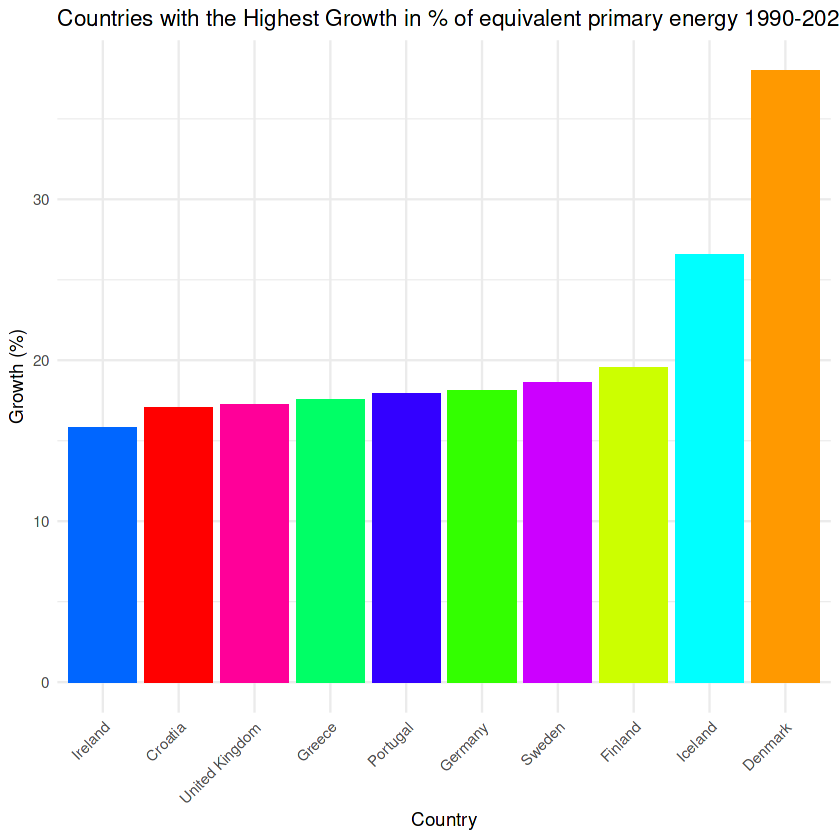

In [12]:
# bar chart for the top 10 countries with highest growth in renewable electricity generation from 1990 to 2021
ggplot(top_10_energy, aes(x = reorder(Entity, Total_Growth), y = Total_Growth, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Growth in % of equivalent primary energy 1990-2021",
       x = "Country",
       y = "Growth (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_energy)))

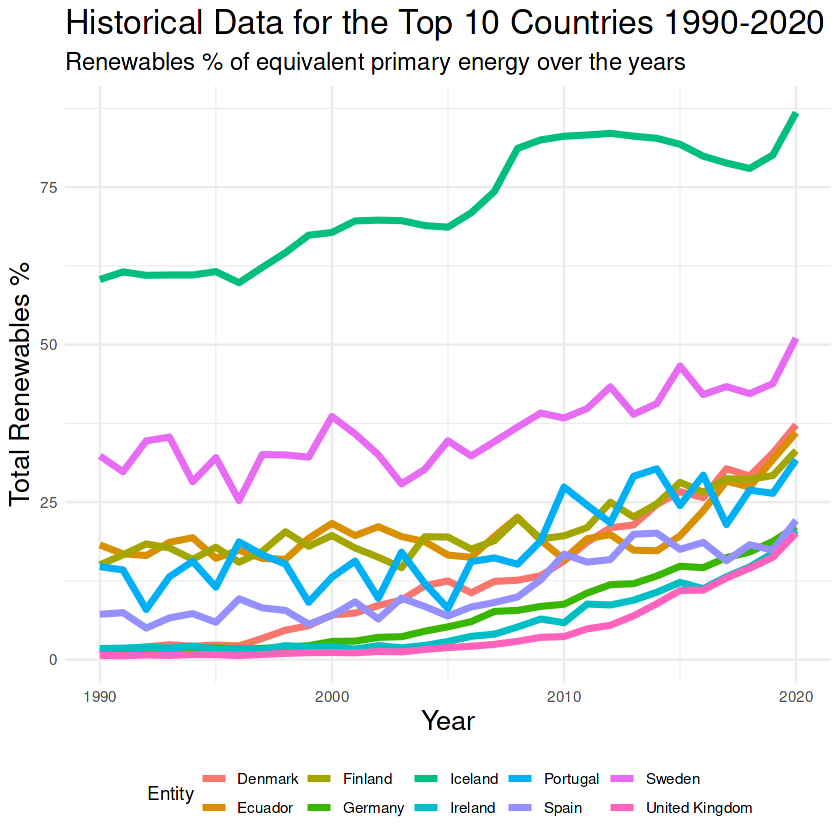

In [13]:
top_10_countries <- c("Denmark", "Iceland", "Germany", "United Kingdom", "Ireland", "Sweden", "Finland", "Ecuador", "Portugal", "Spain")
top_countries_data <- renewable_energy %>%
  select("Entity", "Year", "Renewables (% equivalent primary energy)") %>%
  filter(Entity %in% top_10_countries, Year >= 1990 & Year <= 2020)

# Plot the historical data for the top 10 countries with a subtitle
ggplot(top_countries_data, aes(x = Year, y = `Renewables (% equivalent primary energy)`, color = Entity, group = Entity)) +
  geom_line(linewidth = 1.5) +
  labs(title = "Historical Data for the Top 10 Countries 1990-2020",
       subtitle = "Renewables % of equivalent primary energy over the years",
       x = "Year",
       y = "Total Renewables %") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20),        # Adjust the title font size
    plot.subtitle = element_text(size = 14),     # Adjust the subtitle font size
    axis.title = element_text(size = 16),        # Adjust the axis labels font size
    legend.position = "bottom"                  # Move the legend to the bottom of the plot
  )

Iceland is the country with the highest % of equivalent primary energy from renewable energies, with almost 80% in 2020, but it only grew up 26.5% from 1990 to 2020, while Denmark grew up 36% in the same period of time.

### 4.1.2. Evolution of % of Equivalent Primary Energy by Continents 1990-2021.

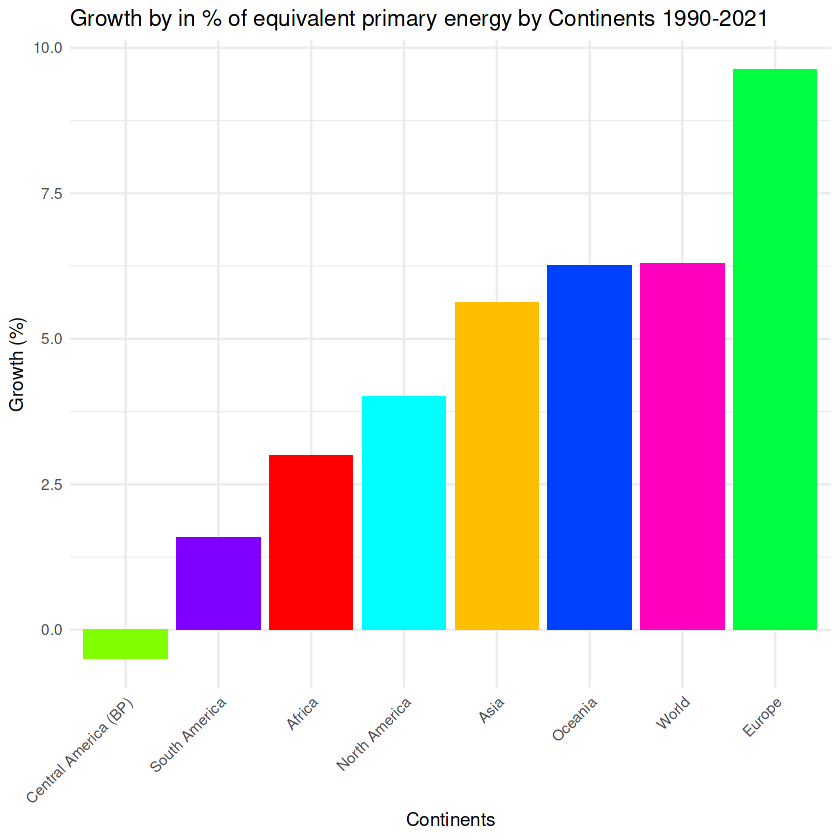

In [27]:
# Create a vector of continent names
continents <- c("Africa", "Asia", "Europe", "North America", "Central America (BP)", "South America", "Oceania", "World")

# Filter the data for years between 1990 and 2021 and for continent names
renewable_energy_continents <- renewable_energy %>%
  filter(Year >= 1990 & Year <= 2021, Entity %in% continents)

# Calculate the difference between the last and first year for each continent from 1990 to 2021
renewable_energy_continents <- renewable_energy_continents %>%
  group_by(Entity) %>%
  summarise(Total_Growth = last(`Renewables (% equivalent primary energy)`) - first(`Renewables (% equivalent primary energy)`))

# Sort continents in descending order based on the difference in renewable energy generation
sorted_continents <- renewable_energy_continents %>%
  arrange(desc(Total_Growth))

# bar chart for the top 10 countries with highest growth in renewable electricity generation from 1990 to 2021
ggplot(renewable_energy_continents, aes(x = reorder(Entity, Total_Growth), y = Total_Growth, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Growth by in % of equivalent primary energy by Continents 1990-2021",
       x = "Continents",
       y = "Growth (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(renewable_energy_continents)))

As mentioned in the last section, in this case is not possible to merged North, South and Central America into one single group because the data is in percentage. So, considering that, Europe is the continent with the highest growth percentage with almost 10% from 1990 to 2021.

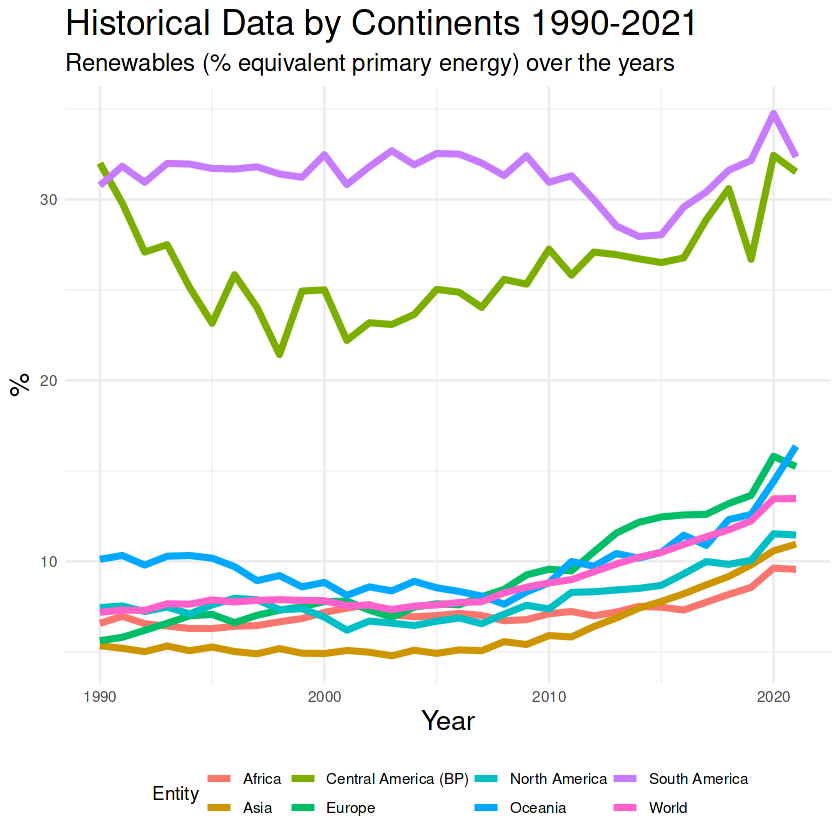

In [28]:
# Create a vector of continent names
continents <- c("Africa", "Asia", "Europe", "North America", "Central America (BP)", "South America", "Oceania", "World")

# Filter the data for years between 1990 and 2021 and for continent names
renewable_energy_continents <- renewable_energy %>%
  filter(Year >= 1990 & Year <= 2021, Entity %in% continents)

# Plot the historical data for continents
ggplot(renewable_energy_continents, aes(x = Year, y = `Renewables (% equivalent primary energy)`, color = Entity, group = Entity)) +
  geom_line(linewidth = 1.5) +
  labs(title = "Historical Data by Continents 1990-2021",
       subtitle = "Renewables (% equivalent primary energy) over the years",
       x = "Year",
       y = "%") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 21),        # Adjust the title font size
    plot.subtitle = element_text(size = 14),     # Adjust the subtitle font size
    axis.title = element_text(size = 16),        # Adjust the axis labels font size
    legend.position = "bottom"                  # Move the legend to the bottom of the plot
  )

From this graph, South and Central America has the highest % of equivalent primary energy from renewable energies, with around 30%. But that mean amount has barely changed since 1990, contrary to Europe, where the % of equivalent primary energy from renewable energies was around 5% in 1990 and in 30 years became more than 15%. 

The world percentage changed from around 7% in 1990 to almost 14% in 2021.

It's important to mention that having the highest growth doesn't mean having the highest % of equivalent primary energy from renewable energies, as shown in the graphs, nor having the highest amount of renewable energy generated, that percentage is only the relation between their fossil and renewable  produced energies seen as primary energy.


### 4.1.3. World Growth in % of Equivalent Primary Energy 1990-2021.

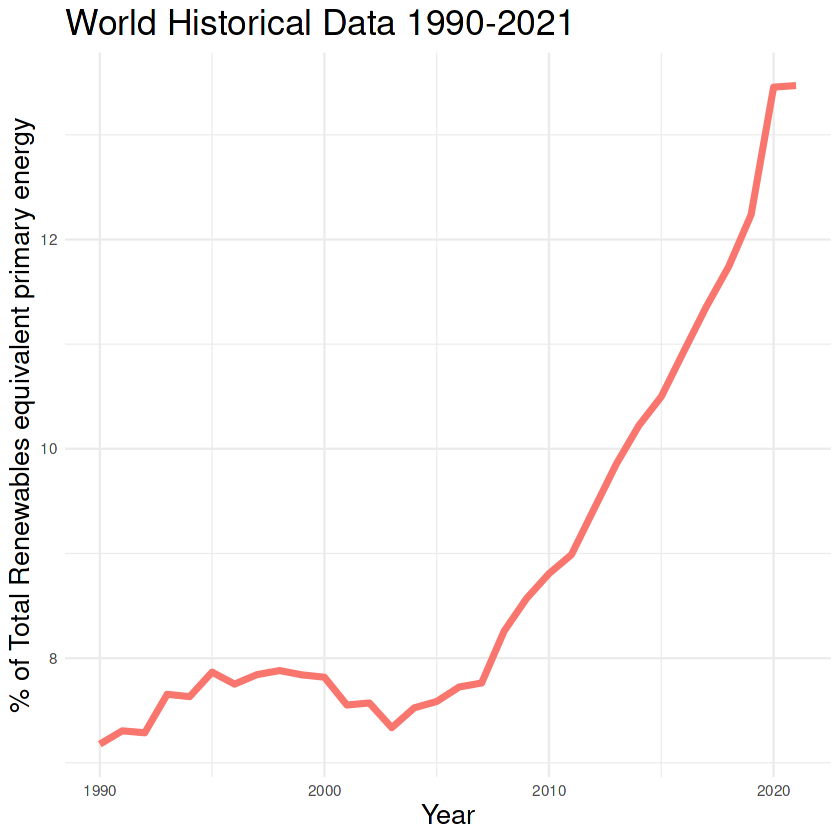

In [16]:
# Filter the data for years between 1990 and 2021 and for continent names
renewable_energy_world <- renewable_energy %>%
    select("Entity", "Year", 
    Renewables = "Renewables (% equivalent primary energy)", 
    Wind = "Wind (% equivalent primary energy)", 
    Hydro = "Hydro (% equivalent primary energy)", 
    Solar = "Solar (% equivalent primary energy)") %>%
  filter(Year >= 1990 & Year <= 2021, Entity == "World" )

# Plot the historical data for continents
ggplot(renewable_energy_world, aes(x = Year, y = `Renewables`, color = Entity, group = Entity)) +
  geom_line(linewidth = 1.5) +
  labs(title = "World Historical Data 1990-2021",
       x = "Year",
       y = "% of Total Renewables equivalent primary energy") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 21),        # Adjust the title font size
    plot.subtitle = element_text(size = 14),     # Adjust the subtitle font size
    axis.title = element_text(size = 16),        # Adjust the axis labels font size
    legend.position = "none"                  # Move the legend to the bottom of the plot
  )

This graph shows the total % of equivalent primary energy from renewable energies in the world from 1990 to 2021. From 1990 to 2007, there was a total grow of less than 2%, and after 2007 the situation improved with a continuos growth of more than 5%. Nevertheless, that percentage is still very low, below the 14% in 2021. In the next chart there are data for Hydro, Wind, Solar and other Renewable energies:

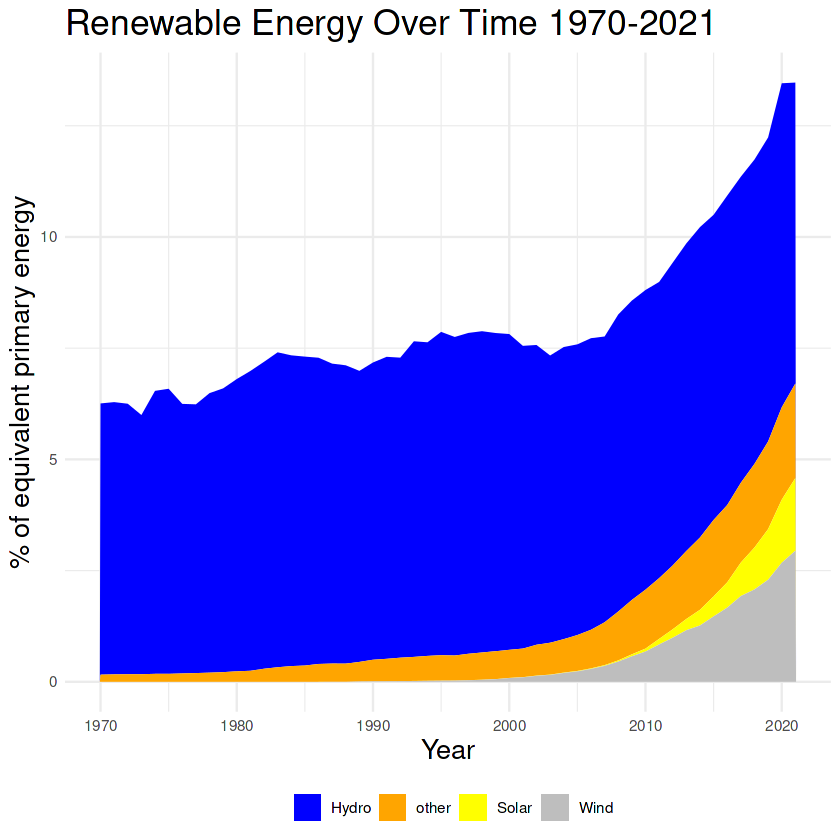

In [17]:
# Filter the data for years between 1970 and 2021 and for continent names
renewable_energy_world <- renewable_energy %>%
    select("Entity", "Year", 
    Renewables = "Renewables (% equivalent primary energy)", 
    Wind = "Wind (% equivalent primary energy)", 
    Hydro = "Hydro (% equivalent primary energy)", 
    Solar = "Solar (% equivalent primary energy)") %>%
  filter(Year >= 1970 & Year <= 2021, Entity == "World" )

# Calculate the 'other' component for each year
renewable_energy_world <- renewable_energy_world %>%
  mutate(other = Renewables - Wind - Hydro - Solar)

# Melt the data for plotting
melted_data <- renewable_energy_world %>%
  select(Year, Wind, Hydro, Solar, other) %>%
  pivot_longer(cols = c(Wind, Hydro, Solar, other), names_to = "Component", values_to = "Value")

# Plot the stacked area chart
ggplot(melted_data, aes(x = Year, y = Value, fill = Component)) +
  geom_area() +
  labs(title = "Renewable Energy Over Time 1970-2021",
       x = "Year",
       y = "% of equivalent primary energy",
       fill = "") +
  scale_fill_manual(values = c( "Wind" = "gray", "Hydro" = "blue", "Solar" = "yellow", "other" = "orange")) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 21),        # Adjust the title font size
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 16),        # Adjust the axis labels font size
    legend.position = "bottom"                  # Move the legend to the bottom of the plot
  )

Hydro energy has been the one with the highest share in the world and the most established primary energy renewable resource, although in the last years, wind, solar and other natural resources has been increasing their shares and almost half of the % of equivalent primary energy comes from them.

## 4.2. Total Capacity in TWh
### 4.2.1. Top 10 Countries with the highest capacity in Total Renewable Energy in 2021
In this section, the data in TWh will be analyzed. The data that was found in the last sections and sorted in tables is now plotted in the next charts. First, the top 10 countries with the highest capacity:

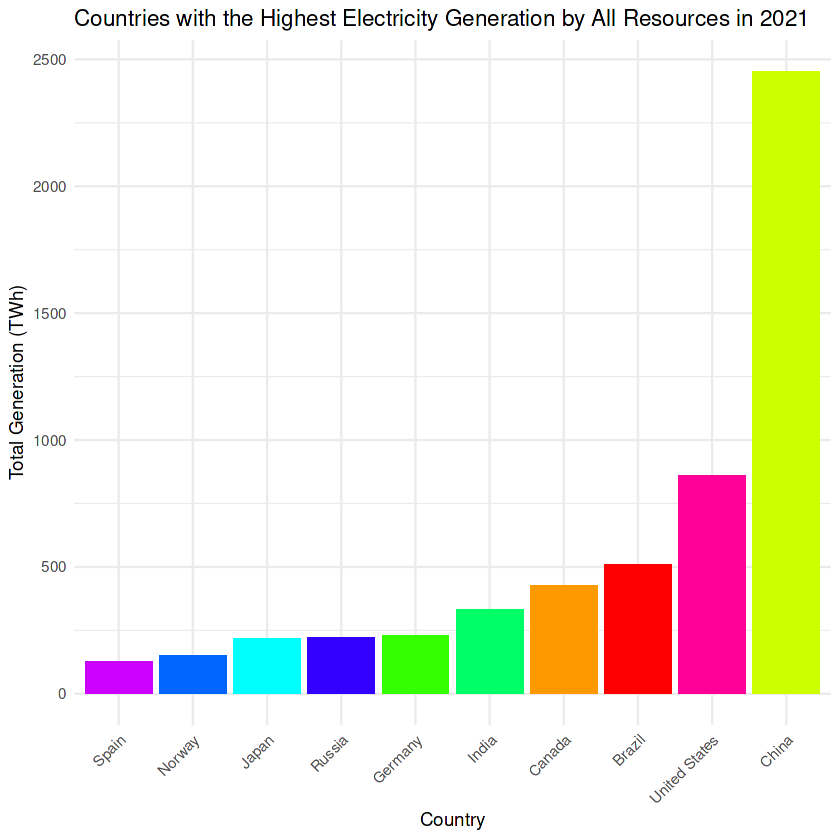

In [18]:
# Filter the data for the year 2021
countries_electricity_2021 <- countries_ele %>%
  filter(Year == 2021)

# Calculate the total renewable electricity generation for each country in 2021
countries_electricity_total <- countries_electricity_2021 %>%
  mutate(TotalRenewables = `Electricity from wind (TWh)` + `Electricity from hydro (TWh)` +
                              `Electricity from solar (TWh)` + `Other renewables including bioenergy (TWh)`) %>%
  group_by(Entity) %>%
  summarise(TotalGeneration = sum(TotalRenewables, na.rm = TRUE)) %>%
  arrange(desc(TotalGeneration))  # Sort in descending order

# Select the top 10 countries
top_10_countries <- countries_electricity_total %>%
  top_n(10, TotalGeneration)

# bar chart for the top 10 countries with highest electricity generation by other resources in 2021
ggplot(top_10_countries, aes(x = reorder(Entity, TotalGeneration), y = TotalGeneration, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Electricity Generation by All Resources in 2021",
       x = "Country",
       y = "Total Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

As from the results from the last section, China is the country with the highest total generation from all renewable resource in 2021.

### 4.2.2. Top 10 Countries with the highest capacity in each category in 2021.

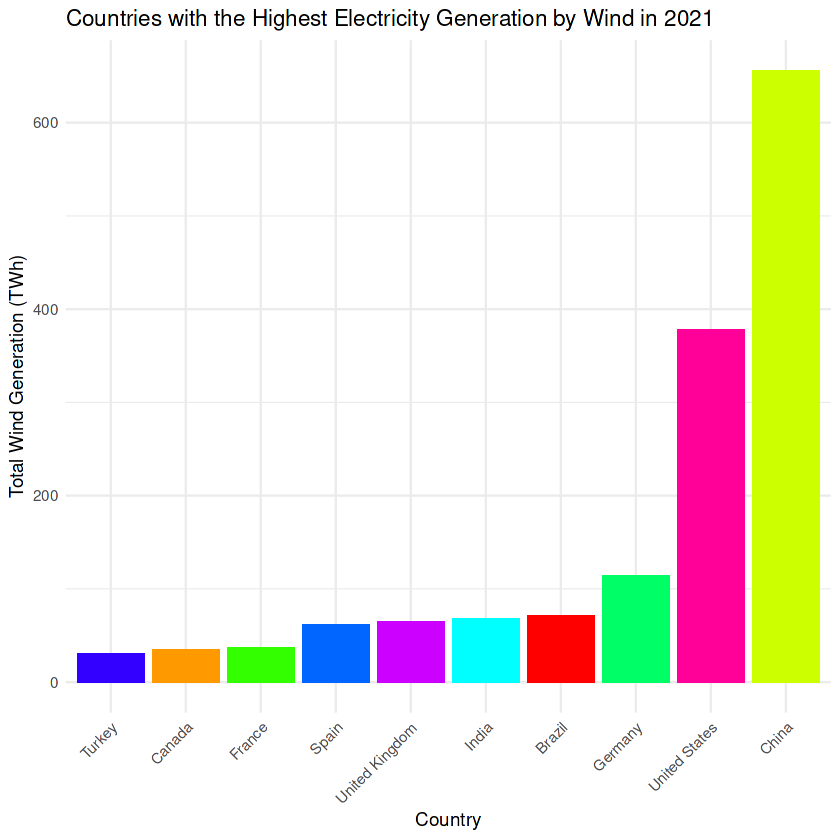

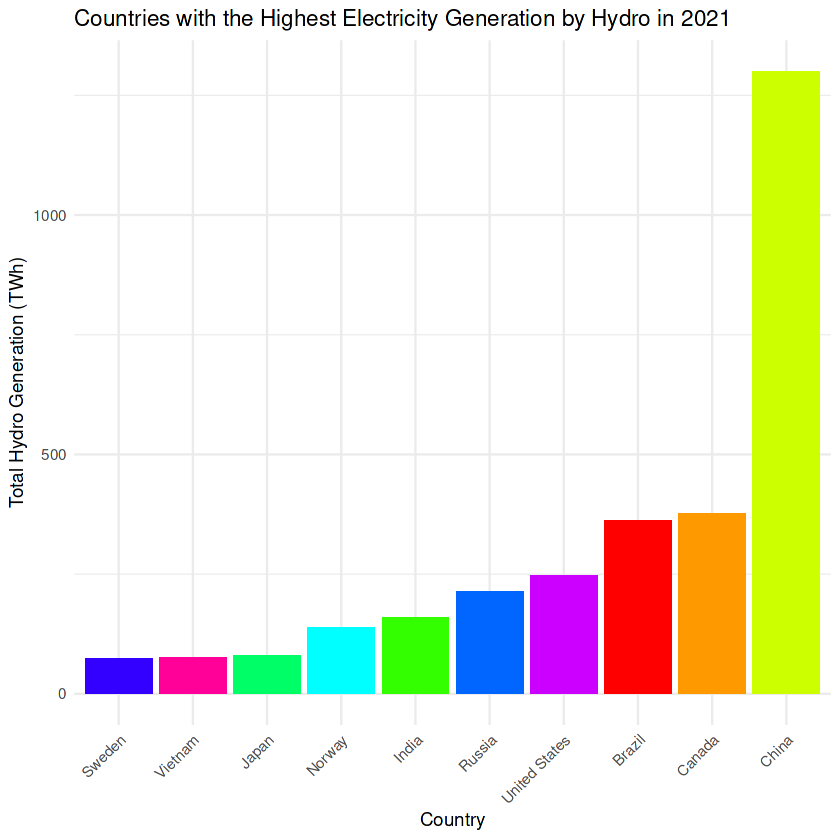

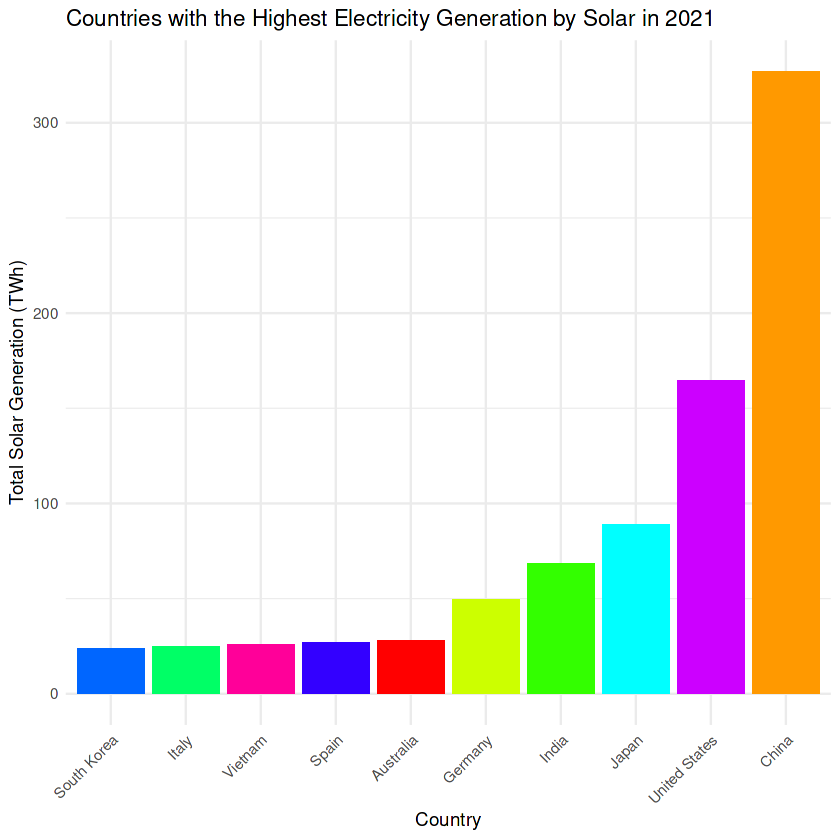

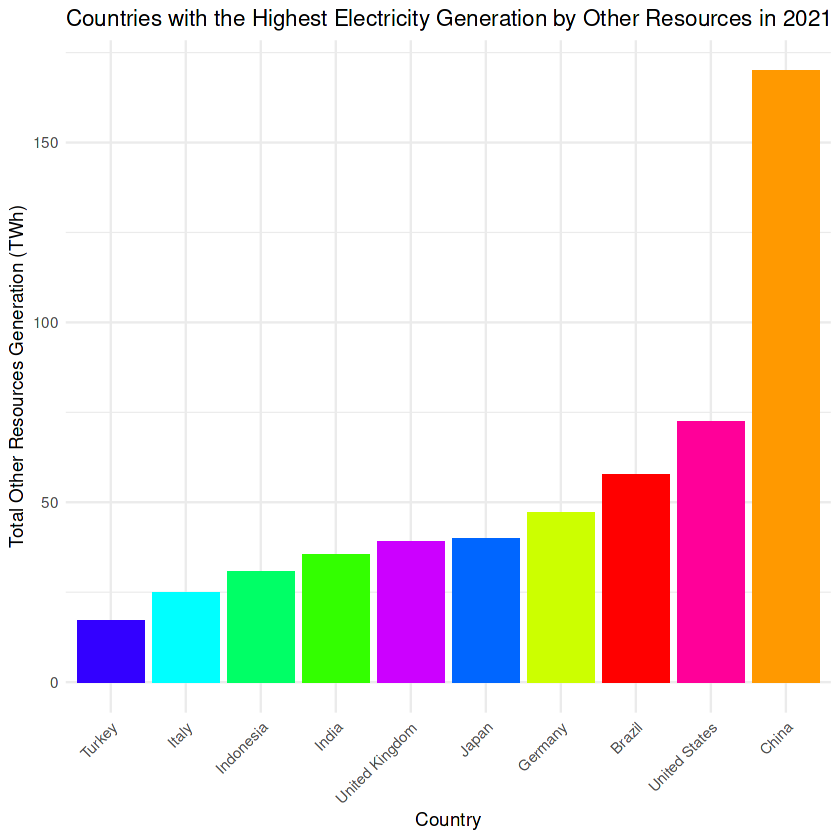

In [19]:
# bar chart for the top 10 countries with highest electricity generation by wind in 2021
ggplot(top_10_countries_wind, aes(x = reorder(Entity, TotalWind), y = TotalWind, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Electricity Generation by Wind in 2021",
       x = "Country",
       y = "Total Wind Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

# bar chart for the top 10 countries with highest electricity generation by hydro in 2021
ggplot(top_10_countries_hydro, aes(x = reorder(Entity, TotalHydro), y = TotalHydro, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Electricity Generation by Hydro in 2021",
       x = "Country",
       y = "Total Hydro Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

# bar chart for the top 10 countries with highest electricity generation by wind in 2021
ggplot(top_10_countries_solar, aes(x = reorder(Entity, TotalSolar), y = TotalSolar, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Electricity Generation by Solar in 2021",
       x = "Country",
       y = "Total Solar Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

# bar chart for the top 10 countries with highest electricity generation by other resources in 2021
ggplot(top_10_countries_other, aes(x = reorder(Entity, TotalOther), y = TotalOther, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Electricity Generation by Other Resources in 2021",
       x = "Country",
       y = "Total Other Resources Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

China again is the country with the highest total generation in every category.

### 4.2.3. Top 10 Countries with the Highest Growth in Total Capacity 1990-2021.


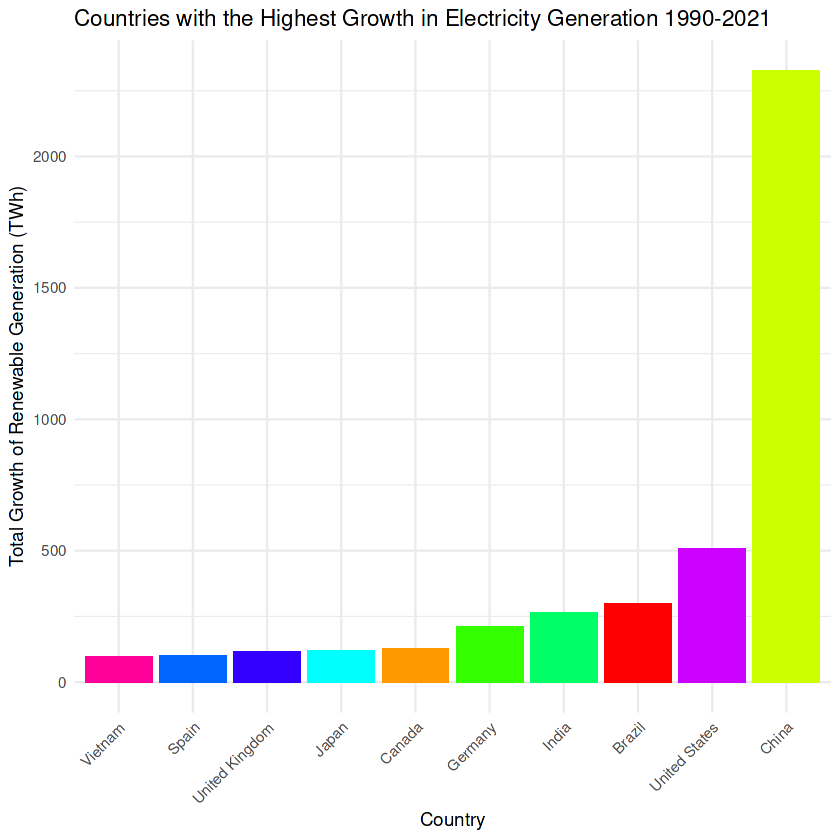

In [20]:
# bar chart for the top 10 countries with highest growth in renewable electricity generation from 1990 to 2021
ggplot(top_10_growth, aes(x = reorder(Entity, TotalGrowth), y = TotalGrowth, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Growth in Electricity Generation 1990-2021",
       x = "Country",
       y = "Total Growth of Renewable Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(top_10_countries)))

China is the country with the highest growth with an increase in it's capacity of more than 2300 TWh from 1990 to 2021.

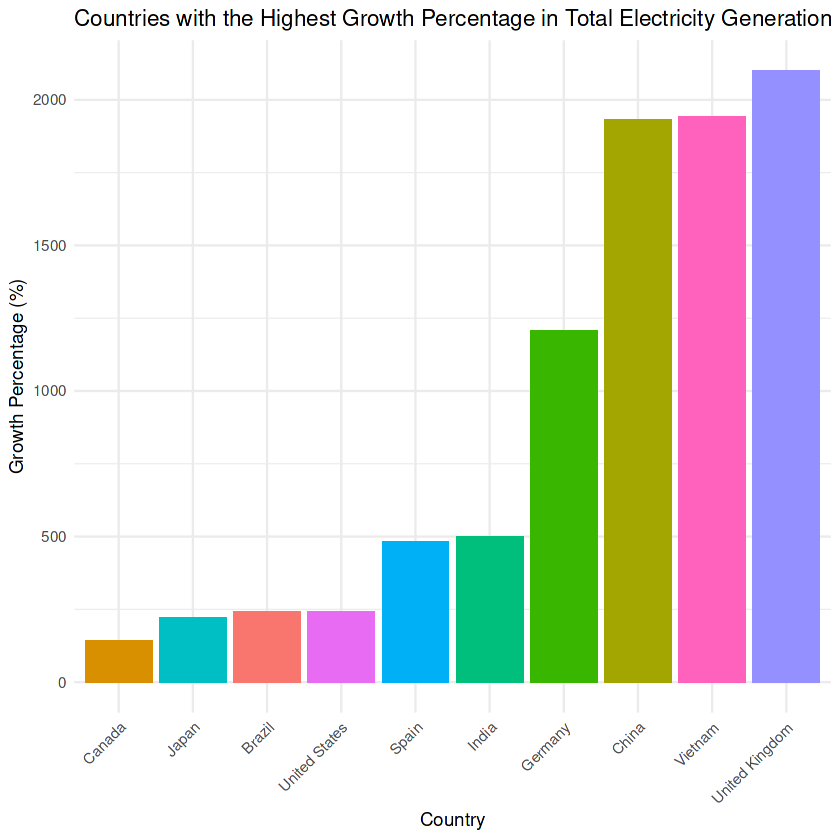

In [21]:
# Calculate the percentage growth for each country
top_10_growth <- top_10_growth %>%
  mutate(PercentageGrowth = ( `2021`/ `1990`) * 100)

# Plot the bar chart for percentage growth
ggplot(top_10_growth, aes(x = reorder(Entity, PercentageGrowth), y = PercentageGrowth, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Countries with the Highest Growth Percentage in Total Electricity Generation 1990-2021",
       x = "Country",
       y = "Growth Percentage (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none")

But in growth percentage the United Kingdom leads the way with a growth of more than 2000% from 1990 to 2021.

### 4.2.4. Growth in Total Capacity by Continents 1990-2021.

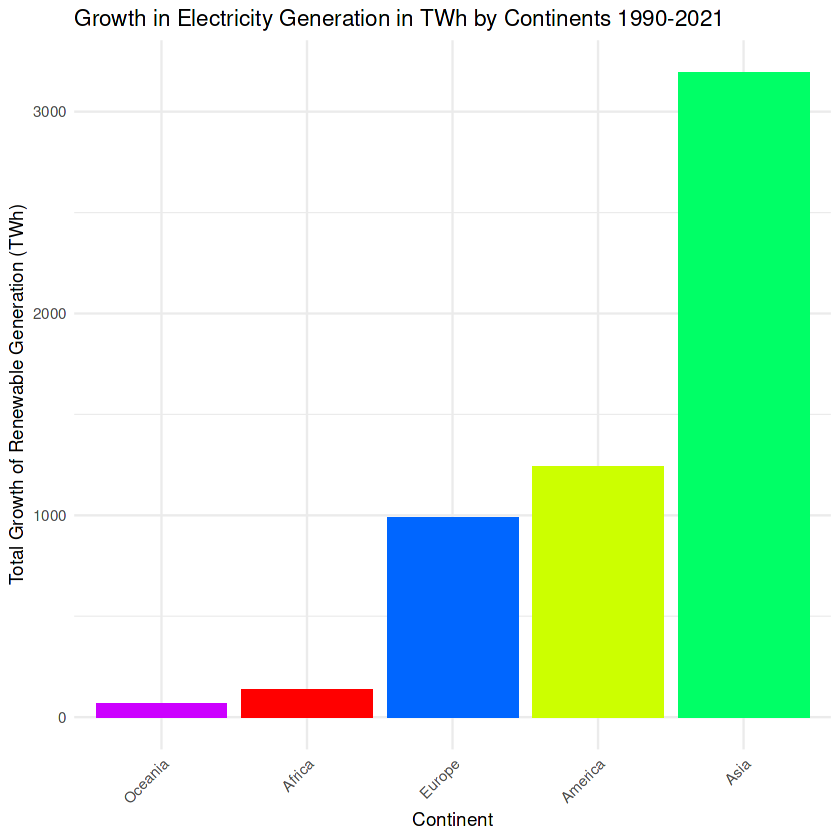

In [22]:
# bar chart for the top 10 countries with highest growth in renewable electricity generation from 1990 to 2021
ggplot(continents_capacity_perc, aes(x = reorder(Entity, TotalGrowthCont), y = TotalGrowthCont, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Growth in Electricity Generation in TWh by Continents 1990-2021",
       x = "Continent",
       y = "Total Growth of Renewable Generation (TWh)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(continents_capacity_perc)))

As mentioned in the previous section, in this case it is possible to merge North, South and Central America into one single group, America. So, in this chart it is clear that Asia is the continent with the highest growth in total renewable generation with more than 3000 TWh.

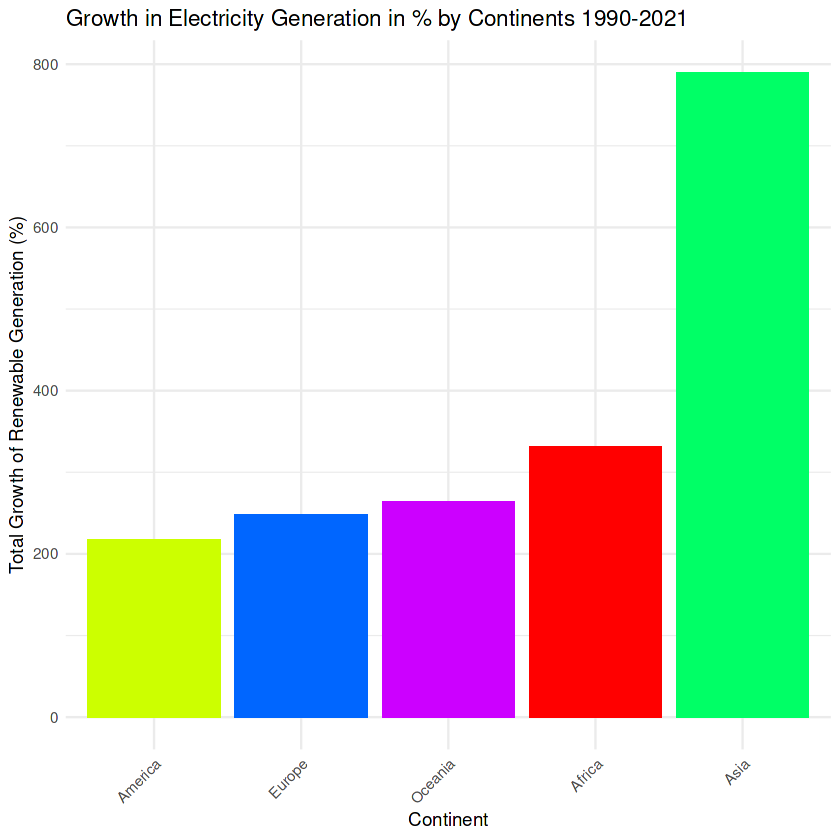

In [23]:
# Filter the data for the years 1990 and 2021
continents_capacity_perc <- continents_capacity_perc %>%
  filter(!Entity == "World")

# bar chart for the top 10 countries with highest growth in renewable electricity generation from 1990 to 2021
ggplot(continents_capacity_perc, aes(x = reorder(Entity, PercentageGrowthCont), y = PercentageGrowthCont, fill = Entity)) +
  geom_bar(stat = "identity") +
  labs(title = "Growth in Electricity Generation in % by Continents 1990-2021",
       x = "Continent",
       y = "Total Growth of Renewable Generation (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none") +
  scale_fill_manual(values = rainbow(nrow(continents_capacity_perc)))

In percentage, Asia is also the continent with the highest growth with almost 800%.

### 4.2.5. World Growth in Total Capacity 1990-2021.

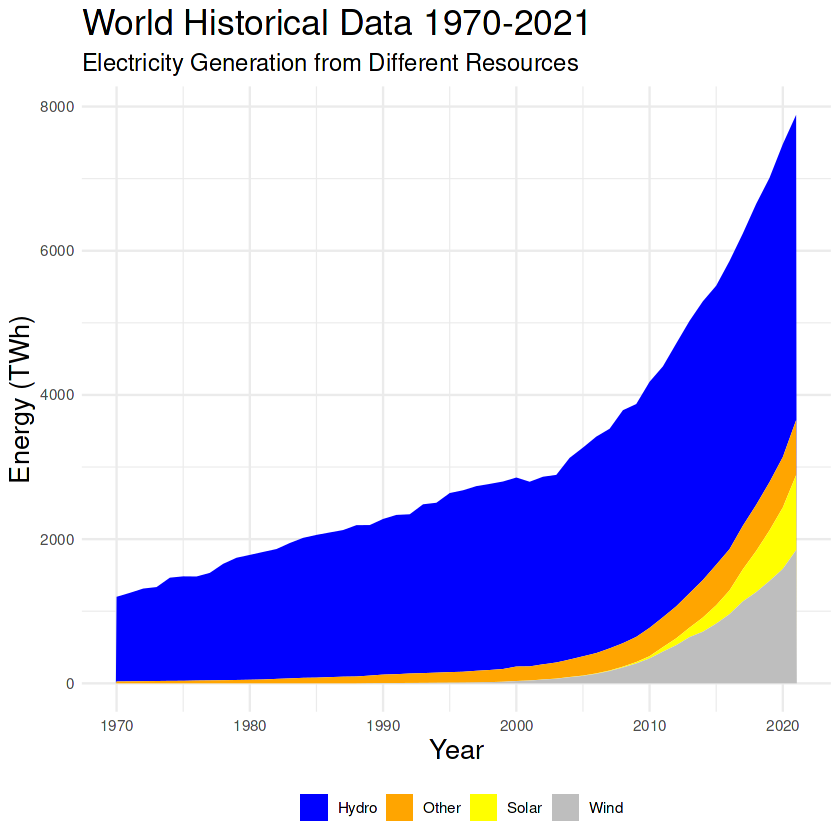

In [24]:
# Filter the data for years between 1970 and 2021 and for continent names
renewable_energy_continents <- continents_ele %>%
  select("Entity", "Year", 
         Wind = "Electricity from wind (TWh)", 
         Hydro = "Electricity from hydro (TWh)", 
         Solar = "Electricity from solar (TWh)",
         Other = "Other renewables including bioenergy (TWh)") %>%
  filter(Year >= 1970 & Year <= 2021, Entity == "World")

# Melt the data for plotting
melted_data_continents <- renewable_energy_continents %>%
  pivot_longer(cols = c(Wind, Hydro, Solar, Other), names_to = "Component", values_to = "Value")

# Plot the stacked area chart for continents
ggplot(melted_data_continents, aes(x = Year, y = Value, fill = Component)) +
  geom_area() +
  labs(title = "World Historical Data 1970-2021",
       subtitle = "Electricity Generation from Different Resources",
       x = "Year",
       y = "Energy (TWh)",
       fill = "") +
  scale_fill_manual(values = c("Wind" = "gray",
                                "Hydro" = "blue",
                                "Solar" = "yellow",
                                "Other" = "orange")) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 21),
    plot.subtitle = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.position = "bottom"
  )

This last chart shows the world share of wind, hydro, solar and other renewable resources plotted in time from 1970 to 2021. Hydro is the renewable resource with the highest share, followed in the last years by wind power generation.

# 5. Conclusions


*  The Country with the highest growth in % of equivalent primary energy derived from renewable resources from 1990 to 2021 is **Denmark** with a growth of **36%**.

*  The continent with the highest growth percentage is **Europe**, with almost **10%** from 1990 to 2021.

*  From 1990 to 2007, there was a growth in the % of equivalent primary energy derived from renewable resources in the **World** of less than **2%**. After 2007, the situation improved with a continuos growth of more than **5%** until 2021. **The biggest share has been for Hydro**, although in the last years, wind, solar and other natural resources has been increasing their shares and almost half of the % of equivalent primary energy comes from them in 2021.

*  The country with the highest Renewable Energy Capacity in Electricity Generation is **China**, with **2453 TWh**.

*  The country with the highest Renewable Energy Capacity in Electricity Generation in every category is **China**, with **655.6 TWh** in Wind, **1300 TWh** in Hydro, **327 TWh** in Solar and **169.93 TWh** in biofuel and Geothermal.

*  The country with the highest growth in Renewable Energy Capacity in TWh from 1990 to 2021 is **China**, with an increase of 2325.71959 TWh. But, the country with the biggest growth percentage is the **United Kingdom**, with **2099.656%**. 

*  The continent with the highest growth in Renewable Energy Capacity in TWh from 1990 to 2021 is **Asia**, with an increase of **3194.12 TWh** and a growth percentage of **789.8163%**.

*  The total growth in the capacity in TWh in the **World** from 1990 to 2021 is **5605.07928 TWh**, while the percent growth is for that period of time is **345.84%**. The world total Renewable Energy Capacity for Electricty Generation in 2021 is **7885.04 TWh**.